In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statistics as st
import tqdm

# data cleaning

In [3]:
data=pd.read_csv('Data analyst Task.csv')
data.drop([0,1,2,3,4],axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)
data.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,6,6,1/1/2022,0,NaN,10000
1,7,7,1/1/2022,0,NaN,29500
2,8,8,1/1/2022,10000,1.0,10000
3,9,9,1/1/2022,0,NaN,5000
4,10,10,1/1/2022,0,NaN,35000


In [4]:
created_at=[]
for item in data.created_at:
    cd=item
    created_at.append(datetime.date(int(cd[-4:]),int(cd[:cd.find('/')]),int(cd[cd.find('/')+1:-5])))
data['created_at']=created_at
data.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,6,6,2022-01-01,0,NaN,10000
1,7,7,2022-01-01,0,NaN,29500
2,8,8,2022-01-01,10000,1.0,10000
3,9,9,2022-01-01,0,NaN,5000
4,10,10,2022-01-01,0,NaN,35000


# plotting # order per month

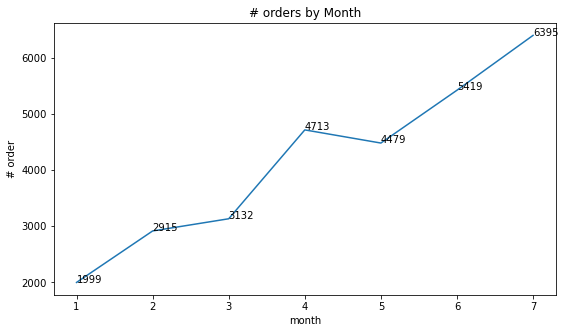

In [5]:
months=[item.month for item in data.created_at]
month_counts=[months.count(item) for item in set(months)]

plt.figure(figsize=(9,5))
plt.plot(month_counts)
for i in month_counts:
    plt.text(month_counts.index(i),i,s=i)
plt.title('# orders by Month')
plt.ylabel('# order')
plt.xlabel('month')
plt.xticks(ticks=range(7),labels=[1,2,3,4,5,6,7])
plt.show()

In [6]:
sum_basket=[]
for item in range(1,8):
    temp=data[data.apply(lambda row : row['created_at'].month==item , axis=1)]
    sum_basket.append(round(temp.basket.sum(),-6))

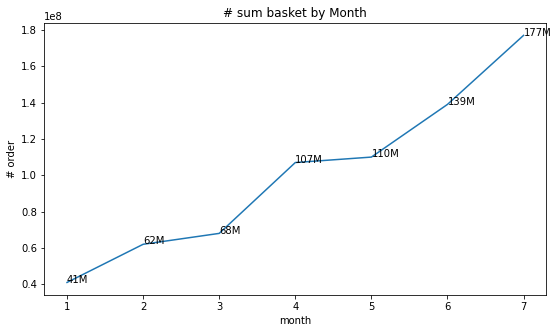

In [20]:
plt.figure(figsize=(9,5))
plt.plot(sum_basket)
for i in sum_basket:
    plt.text(sum_basket.index(i),i,s=f'{str(i)[:-6]}M')
plt.title('# sum basket by Month')
plt.ylabel('# order')
plt.xlabel('month')
plt.xticks(ticks=range(7),labels=[1,2,3,4,5,6,7])
plt.show()